<a href="https://colab.research.google.com/github/KingJayant/Parameter-Optimisation-For-SVM/blob/main/ParameterOptimizationforSVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Importing Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings('ignore')

###Uploading the Dataset from UCI Library

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Bias_correction_ucl.csv to Bias_correction_ucl.csv


In [ ]:
dataset = pd.read_csv('Bias_correction_ucl.csv')
dataset.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


###Pre-Processing of Dataset

In [ ]:
dataset.shape

(7752, 25)

In [ ]:
dataset.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [ ]:
dataset=dataset.dropna(axis=0, how='any')

In [ ]:
dataset

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,2017-08-30,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,...,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7
7746,22.0,2017-08-30,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,...,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1
7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1
7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8


In [ ]:
dataset.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [ ]:
dataset['AvgTemp'] = (dataset['Next_Tmax'] + dataset['Next_Tmin'])/2
dataset

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,AvgTemp
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,25.15
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,26.50
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,27.50
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,28.00
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,26.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,2017-08-30,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,...,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7,22.65
7746,22.0,2017-08-30,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,...,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1,22.55
7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1,23.20
7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8,23.70


In [ ]:
dataset['Class'] = ["High" if x >26 else "Low" for x in dataset['AvgTemp']]
dataset


,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,AvgTemp,Class
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,25.15,Low
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,26.50,High
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,27.50,High
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,28.00,High
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,26.85,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,2017-08-30,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,...,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7,22.65,Low
7746,22.0,2017-08-30,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,...,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1,22.55,Low
7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1,23.20,Low
7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8,23.70,Low


In [ ]:
dataset = dataset.drop(['Date'],axis=1)

<Axes: xlabel='Class', ylabel='count'>

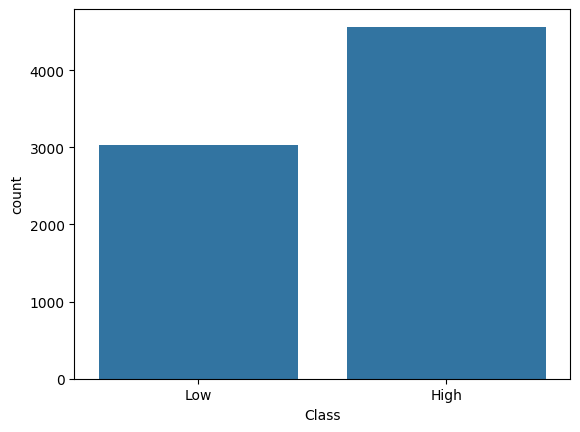

In [ ]:
sns.countplot(x = 'Class', data=dataset)

In [ ]:
X = dataset.iloc[:,0:-1]
y = dataset['Class']

In [ ]:
ss = StandardScaler()
ss.fit_transform(X)

array([[-1.66460654, -0.35331763, -0.74802891, ..., -0.36686121,
        -0.68926525, -0.56632021],
       [-1.52605214,  0.72513836, -0.66472063, ...,  0.08306779,
        -0.1655135 , -0.03024756],
       [-1.38749775,  0.62403311,  0.0433998 , ...,  0.27589451,
         0.39852685,  0.36684328],
       ...,
       [ 1.38359018, -2.17321212, -2.53915704, ..., -0.6239635 ,
        -1.93821173, -1.34064736],
       [ 1.52214457, -2.17321212, -2.28923218, ..., -0.52755014,
        -1.65619156, -1.14210194],
       [ 1.66069897, -2.20691387, -2.41419461, ..., -0.78465243,
        -2.2202319 , -1.57890187]])

###Creation of 10 samples with 70-30 ratio of Training and Testing Set

In [ ]:
samples = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    samples.append((X_train, X_test, y_train, y_test))

In [ ]:
samples

[(      station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
  69       20.0          27.1          22.6    58.532623    99.541161   
  3746     22.0          27.0          23.8    65.640007    92.987854   
  4376      2.0          27.1          22.4    62.482933    93.729530   
  786      12.0          28.3          23.2    45.992992    84.653282   
  630       6.0          30.5          23.1    43.819996    88.618080   
  ...       ...           ...           ...          ...          ...   
  4992     18.0          30.6          24.6    48.130096    86.974968   
  3307      8.0          25.6          21.3    56.211494    72.446777   
  1693     19.0          29.3          22.0    32.470078    85.095413   
  2649     25.0          30.2          23.0    58.625172    83.594475   
  2774     25.0          26.4          24.0    68.687103    90.412285   
  
        LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
  69           28.071354         19.82633

### Creation of a Fitness Function

In [ ]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
result = pd.DataFrame(columns=['Sample', 'Best Accuracy', 'Best Kernel', 'Best Nu', 'Best Epsilon'])

In [ ]:
def fitnessFunction(kernel, C, gamma):
  svm = SVC(kernel=kernel, C=C, gamma=gamma, max_iter=1000)
  svm.fit(X_train, y_train)
  y_pred = svm.predict(X_test)
  return accuracy_score(y_pred, y_test)

### Calling the Function for Every Sample

In [ ]:
for i in range(len(samples)):
  best_accuracy = 0
  best_C = 0
  best_gamma = 0
  for kernel in kernels:
    X_train, X_test, y_train, y_test = samples[i]
    C = np.random.uniform(0, 10)
    gamma = np.random.uniform(0, 10)
    score = fitnessFunction(kernel, C, gamma)
    if score>best_accuracy:
      best_accuracy = round(score, 2)
      best_C = round(C, 2)
      best_gamma = round(gamma, 2)
      best_kernel = kernel
  print('Best Accuracy = ', best_accuracy, 'Best Kernel = ', best_kernel, 'Best Nu = ', best_C, 'Best Epsilon = ', best_gamma)
  result.loc[i] = [i+1, best_accuracy, best_kernel, best_C, best_gamma]

Best Accuracy =  0.94 Best Kernel =  linear Best Nu =  5.5 Best Epsilon =  7.17
Best Accuracy =  0.71 Best Kernel =  poly Best Nu =  7.61 Best Epsilon =  3.29
Best Accuracy =  0.72 Best Kernel =  linear Best Nu =  1.5 Best Epsilon =  5.37
Best Accuracy =  0.61 Best Kernel =  sigmoid Best Nu =  9.62 Best Epsilon =  1.47
Best Accuracy =  0.74 Best Kernel =  linear Best Nu =  9.96 Best Epsilon =  1.39
Best Accuracy =  0.77 Best Kernel =  linear Best Nu =  3.05 Best Epsilon =  6.23
Best Accuracy =  0.95 Best Kernel =  poly Best Nu =  2.13 Best Epsilon =  4.23
Best Accuracy =  0.67 Best Kernel =  linear Best Nu =  0.94 Best Epsilon =  5.09
Best Accuracy =  0.71 Best Kernel =  poly Best Nu =  2.07 Best Epsilon =  7.46
Best Accuracy =  0.58 Best Kernel =  poly Best Nu =  9.89 Best Epsilon =  7.76


###Creation of a Result Table

In [ ]:
result

,Sample,Best Accuracy,Best Kernel,Best Nu,Best Epsilon
0,1,0.94,linear,5.50,7.17
1,2,0.71,poly,7.61,3.29
2,3,0.72,linear,1.50,5.37
3,4,0.61,sigmoid,9.62,1.47
4,5,0.74,linear,9.96,1.39
5,6,0.77,linear,3.05,6.23
6,7,0.95,poly,2.13,4.23
7,8,0.67,linear,0.94,5.09
8,9,0.71,poly,2.07,7.46
9,10,0.58,poly,9.89,7.76


### Plotting of the Convergence Graph/Linear Curve

In [ ]:
X_train, X_test, y_train, y_test = samples[result['Best Accuracy'].idxmax()]

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(SVC(kernel=result['Best Kernel'].iloc[result['Best Accuracy'].idxmax()],
                                                        C=result['Best Nu'].iloc[result['Best Accuracy'].idxmax()],
                                                        gamma=result['Best Epsilon'].iloc[result['Best Accuracy'].idxmax()],
                                                        max_iter = 1000), X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1,
                                                        train_sizes = np.linspace(0.01, 1.0, 50))

In [ ]:
train_sizes

array([  47,  144,  240,  337,  434,  530,  627,  723,  820,  916, 1013,
       1109, 1206, 1303, 1399, 1496, 1592, 1689, 1785, 1882, 1978, 2075,
       2172, 2268, 2365, 2461, 2558, 2654, 2751, 2847, 2944, 3041, 3137,
       3234, 3330, 3427, 3523, 3620, 3716, 3813, 3910, 4006, 4103, 4199,
       4296, 4392, 4489, 4585, 4682, 4779])

In [ ]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

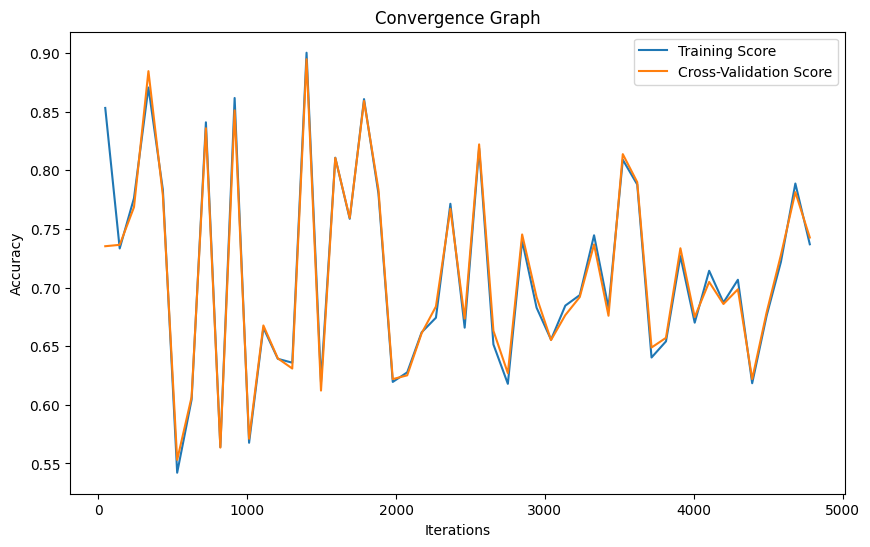

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Convergence Graph')
plt.legend(loc="best")
plt.show()